In [34]:
import pandas as pd
import trafalgar as tg
import utils as ut
import matplotlib.pyplot as plt
import numpy as np

In [8]:
file_name = 'ohlcv_5_13_2021.parquet'
ohlcv = pd.read_parquet(file_name)

In [9]:
ohlcv.head()

Attributes   Open                                                             \
Symbols        SQ  AVID   KIRK          FB       TSLA  CROX HVBTF   NTP UROY   
Date                                                                           
2016-01-04  12.75  7.16  14.26  101.949997  46.144001  9.95  0.02  5.84  NaN   
2016-01-05  12.20  7.97  14.15  102.889999  45.271999  9.85  0.02  5.78  NaN   
2016-01-06  11.50  7.65  13.91  101.129997  44.000000  9.67  0.02  5.80  NaN   
2016-01-07  11.13  7.50  13.31  100.500000  42.838001  9.50  0.02  5.73  NaN   
2016-01-08  11.25  7.49  13.26   99.879997  43.571999  9.57  0.02  5.64  NaN   

Attributes         ...     Volume                                           
Symbols      SCHN  ...        PEP LMR GRAT ETMC WML NILI TOI BTCC HIVE NPI  
Date               ...                                                      
2016-01-04  14.20  ...  6689000.0 NaN  NaN  NaN NaN  NaN NaN  NaN  NaN NaN  
2016-01-05  14.18  ...  4893800.0 NaN  NaN  NaN NaN  NaN NaN  NaN  NaN NaN  
2016-01-06  13.85  ...  5483400.0 NaN  NaN  NaN NaN  NaN NaN  NaN  NaN NaN  
2016-01-07  13.53  ...  5440000.0 NaN  NaN  NaN NaN  NaN NaN  NaN  NaN NaN  
2016-01-08  13.30  ...  4853500.0 NaN  NaN  NaN NaN  NaN NaN  NaN  NaN NaN  

[5 rows x 855 columns]

In [10]:
ohlcv.tail()

Attributes        Open                                                \
Symbols             SQ       AVID       KIRK          FB        TSLA   
Date                                                                   
2021-05-07  240.089996  27.260000  31.559999  322.380005  665.799988   
2021-05-10  229.619995  29.309999  31.510000  314.350006  664.900024   
2021-05-11  205.889999  26.100000  28.780001  300.750000  599.239990   
2021-05-12  215.300003  26.799999  28.780001  301.130005  602.489990   
2021-05-13  208.199997  26.360001  27.410000  306.083008  601.544983   

Attributes                                                ...     Volume      \
Symbols           CROX HVBTF        NTP  UROY       SCHN  ...        PEP LMR   
Date                                                      ...                  
2021-05-07  105.800003  3.15  16.590000  3.59  55.820000  ...  4181000.0 NaN   
2021-05-10  108.500000  3.28  19.040001  3.55  56.500000  ...  5270600.0 NaN   
2021-05-11  101.709999  3.00  18.490000  3.36  53.520000  ...  5266100.0 NaN   
2021-05-12  101.139999  3.14  19.389999  3.33  56.330002  ...  5651700.0 NaN   
2021-05-13   98.980003  2.76  18.830000  3.13  53.240002  ...        NaN NaN   

Attributes                                       
Symbols    GRAT ETMC WML NILI TOI BTCC HIVE NPI  
Date                                             
2021-05-07  NaN  NaN NaN  NaN NaN  NaN  NaN NaN  
2021-05-10  NaN  NaN NaN  NaN NaN  NaN  NaN NaN  
2021-05-11  NaN  NaN NaN  NaN NaN  NaN  NaN NaN  
2021-05-12  NaN  NaN NaN  NaN NaN  NaN  NaN NaN  
2021-05-13  NaN  NaN NaN  NaN NaN  NaN  NaN NaN  

[5 rows x 855 columns]

### Optimize Portfolio
- Sortino
- Sharpe
- Calmar
- Profit
- Alpha
- Beta

In [11]:
close = ohlcv['Close']
close.shape

(1350, 171)

In [12]:
y = 1
td = 252

index = close.isnull().sum()[((~close.isnull()).sum() >= td*y)].index
close = close[index]
close = close.iloc[:-1]
close.shape

(1349, 150)

In [13]:
close.drop(['NOB', 'ONEW'], axis=1, inplace=True)

In [14]:
alg = ut.sortino
dates = ('2021-01-01', '2021-04-01')
assigned, ratio = ut.optimize(alg, close, dates)
assigned

Optimization terminated successfully    (Exit mode 0)
            Current function value: -50.67151796875382
            Iterations: 59
            Function evaluations: 8543
            Gradient evaluations: 57

sortino: 50.67152


,ticker,assigned
101,TMUS,0.266389
57,CNC,0.183218
73,FNKO,0.098495
123,NAKD,0.076290
116,INTT,0.071888
131,GME,0.069521
75,OCGN,0.059826
36,ORGO,0.053822
47,ESTE,0.038543
61,CIDM,0.027511


In [15]:
test_dates = ('2021-04-01', '2021-05-12')
stock_test = close[assigned.ticker].loc[test_dates[0]:test_dates[1]].pct_change()

sortino = -ut.sortino(assigned.assigned.tolist(), stock_test)
sharpe = -ut.sharpe(assigned.assigned.tolist(), stock_test)

print(f'Sortino: {sortino}\nSharpe: {sharpe}')

Sortino: 2.4147959415942455
Sharpe: 1.0402986213184497


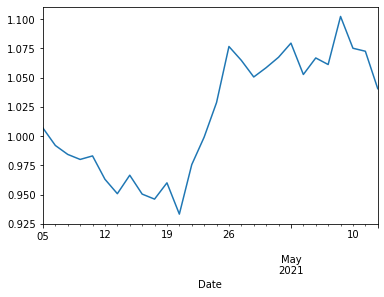

In [16]:
((close[assigned.ticker].loc[test_dates[0]:test_dates[1]].pct_change()[1:]*assigned.assigned.tolist()).sum(axis=1)+1).cumprod().plot()

In [17]:
alg = ut.sharpe
assigned, ratio = ut.optimize(alg, close, dates)
assigned

Optimization terminated successfully    (Exit mode 0)
            Current function value: -14.717252738209002
            Iterations: 46
            Function evaluations: 6858
            Gradient evaluations: 46

sharpe: 14.71725


,ticker,assigned
146,PEP,0.211333
38,UAN,0.089915
62,CME,0.086970
89,CAR,0.079699
51,EPIX,0.079335
85,STKS,0.072253
57,CNC,0.070694
25,SPLP,0.069126
7,NTP,0.056179
99,FUTU,0.039976


In [18]:
stock_test = close[assigned.ticker].loc[test_dates[0]:test_dates[1]].pct_change()

sortino = -ut.sortino(assigned.assigned.tolist(), stock_test)
sharpe = -ut.sharpe(assigned.assigned.tolist(), stock_test)
profit = -ut.profit(assigned.assigned.tolist(), stock_test)

print(f'Sortino: {sortino}\nSharpe: {sharpe}')

Sortino: 5.609478772027885
Sharpe: 3.9289978588022967


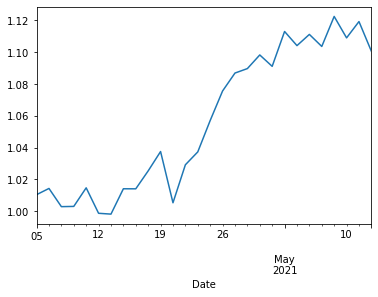

In [19]:
((close[assigned.ticker].loc[test_dates[0]:test_dates[1]].pct_change()[1:]*assigned.assigned.tolist()).sum(axis=1)+1).cumprod().plot()

In [20]:
alg = ut.calmar
assigned, ratio = ut.optimize(alg, close, dates)
assigned

Iteration limit reached    (Exit mode 9)
            Current function value: -25.453645581751
            Iterations: 100
            Function evaluations: 14718
            Gradient evaluations: 96

calmar: 25.45365


,ticker,assigned
62,CME,0.228064
57,CNC,0.205266
146,PEP,0.095928
95,AEO,0.076769
38,UAN,0.050464
25,SPLP,0.049105
73,FNKO,0.044354
131,GME,0.043835
140,AMTX,0.030279
53,GOOGL,0.029367


In [21]:
stock_test = close[assigned.ticker].loc[test_dates[0]:test_dates[1]].pct_change()

sortino = -ut.sortino(assigned.assigned.tolist(), stock_test)
sharpe = -ut.sharpe(assigned.assigned.tolist(), stock_test)

print(f'Sortino: {sortino}\nSharpe: {sharpe}')

Sortino: 6.570543425810625
Sharpe: 3.0438590725206813


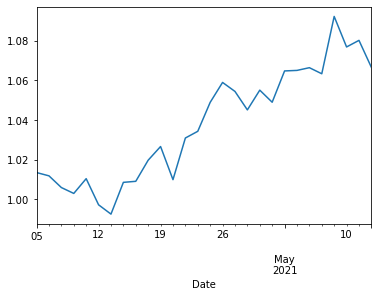

In [22]:
((close[assigned.ticker].loc[test_dates[0]:test_dates[1]].pct_change()[1:]*assigned.assigned.tolist()).sum(axis=1)+1).cumprod().plot()

In [23]:
alg = ut.profit
assigned, ratio = ut.optimize(alg, close, ('2020-01-01', '2021-01-01'))
assigned

Optimization terminated successfully    (Exit mode 0)
            Current function value: -4.496130920329712
            Iterations: 4
            Function evaluations: 592
            Gradient evaluations: 4

profit: 4.49613


,ticker,assigned
6,HVBTF,1.0


In [24]:
alg = ut.alpha_f
assigned, ratio = ut.optimize(alg, close, ('2020-01-01', '2021-01-01'))
assigned

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.016248925635847605
            Iterations: 22
            Function evaluations: 3256
            Gradient evaluations: 22

alpha_f: 0.016


,ticker,assigned
6,HVBTF,0.572826
75,OCGN,0.427174


In [25]:
alg = ut.beta_f
assigned, ratio = ut.optimize(alg, close, ('2020-01-01', '2021-01-01'))
assigned

Optimization terminated successfully    (Exit mode 0)
            Current function value: -2.4036938059027664
            Iterations: 4
            Function evaluations: 592
            Gradient evaluations: 4

beta_f: 2.404


,ticker,assigned
29,GDEN,1.0


### Short Selling

In [99]:
stockprices = close[['AAPL']]
stockprices.columns = ['close']

In [100]:
stockprices

,close
Date,
2016-01-04,26.337500
2016-01-05,25.677500
2016-01-06,25.174999
2016-01-07,24.112499
2016-01-08,24.240000
...,...
2021-05-06,129.740005
2021-05-07,130.210007
2021-05-10,126.849998


In [102]:
#autoregression

In [134]:
https://www.alphavantage.co/documentation/#dailyadj

In [217]:
stockprices = close[['NAKD']]
stockprices.columns = ['close']
stock = stockprices.copy()

results = []

def rsi(stock, ticker, n, lo, hi):
    stock = stock[[ticker]]
    stock['return'] = stock[ticker].pct_change()
    stock['movement'] = stock[ticker].diff()
    stock['up'] = pd.Series(np.where(stock['movement'] > 0, stock['movement'], 0)).rolling(n).mean().tolist()
    stock['down'] = pd.Series(np.where(-stock['movement'] > 0, -stock['movement'], 0)).rolling(n).mean().tolist()
    stock['rs'] = stock['up']/stock['down']
    stock['rsi'] = 100 - (100 / (1 + stock['rs']))
    
    stock['long'] = np.where((stock['rsi'] < lo), 1, np.nan)
    stock['long'] = np.where((stock['rsi'] > hi), 0, stock['long'])
    stock['long'].ffill(inplace=True)
    
    stock['gain_loss'] = stock['long'].shift(1) * stock['return']
    stock['total'] =  stock['gain_loss'].cumsum()
    
    return stock


for n in range(1, 50):
    for x in range(2, 50, 2):
        for y in range(98, 50, -2):
            new = rsi(stock, 'close', n, x, y)
            results.append([n, x, y, new['total'].iloc[-1]])

In [218]:
close[['NAKD']]

Symbols,NAKD
Date,
2016-01-04,381.0000
2016-01-05,397.0000
2016-01-06,390.0000
2016-01-07,374.0000
2016-01-08,345.0000
...,...
2021-05-06,0.5264
2021-05-07,0.5404
2021-05-10,0.5208


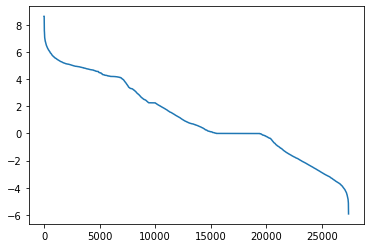

In [223]:
plt.plot(pd.DataFrame(results, columns = ['n', 'low', 'hi', 'gain']).sort_values(by='gain', ascending=False).gain.to_list())

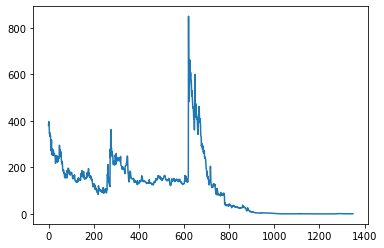

In [225]:
plt.plot(stock['close'].tolist())

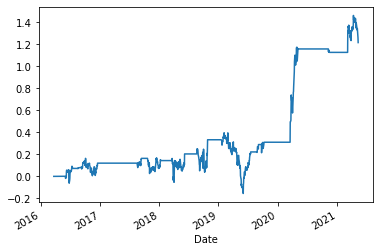

In [213]:
new.total.plot()

In [ ]:
#new = pd.merge(stockprices, RSI, left_index=True, right_index=True)

#If the indicator’s line crosses the level 30 from below, a long position (Buy) is opened.  
new['long'] = np.where((new['RSI'] < 30),1,np.nan)
new['long'] = np.where((new['RSI'] > 70),0,new['long'])

new['long'].ffill(inplace=True)

new['gain_loss'] = new['long'].shift(1) * new['return']

new['total'] =  new['gain_loss'].cumsum()

print(new.tail(600))

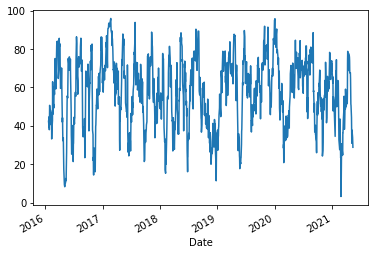

In [154]:
stock.rsi.plot()

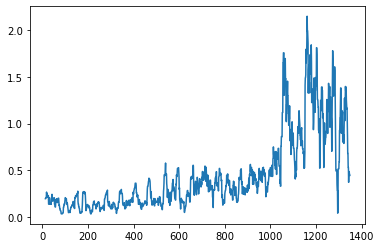

In [124]:
pd.Series(np.where(stock['movement'] > 0, stock['movement'], 0)).rolling(n).mean()

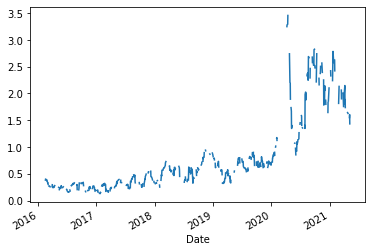

In [122]:
stock.up.plot()

In [114]:
stock['up'].values/stock['down'].values

array([nan, nan, nan, ..., nan, nan, nan])

<ipython-input-92-d05d2bd4a196>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock['return'] = stock[ticker].pct_change()
<ipython-input-92-d05d2bd4a196>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock['movement'] = stock[ticker].diff()
<ipython-input-92-d05d2bd4a196>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

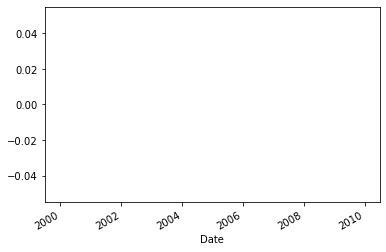

In [94]:
rsi(close, 'AAPL', 14)['rsi'].plot()

In [95]:
n = 14

ret = 1+apple.pct_change()
mov = apple.diff()
up = pd.Series(np.where(mov > 0, mov, 0).flatten()).rolling(n).mean()
down = pd.Series(np.where(mov < 0, mov, 0).flatten()).rolling(n).mean()
rs = up / down
rsi = 100 - (100 / (1 + rs))

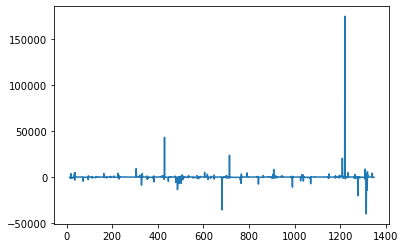

In [96]:
rsi.plot()

In [97]:

stockprices['return'] = np.log(stockprices['close'] / stockprices['close'].shift(1) )

#calculate the movement on the price compared to the previous day closing price
stockprices['movement'] = stockprices['close'] - stockprices['close'].shift(1)

stockprices['up'] = np.where((stockprices['movement'] > 0) ,stockprices['movement'],0)

stockprices['down'] = np.where((stockprices['movement'] < 0) ,stockprices['movement'],0)

window_length = 14
#calculate moving average of the last 14 days  gains
up = stockprices['up'].rolling(window_length).mean()

#calculate moving average of the last 14 days  losses
down = stockprices['down'].abs().rolling(window_length).mean()

RS = up / down

RSI = 100.0 - (100.0 / (1.0 + RS))

RSI = RSI.rename("RSI")
print(RSI)

Date
2016-01-04          NaN
2016-01-05          NaN
2016-01-06          NaN
2016-01-07          NaN
2016-01-08          NaN
                ...    
2021-05-06    37.762995
2021-05-07    37.030824
2021-05-10    33.932223
2021-05-11    31.053413
2021-05-12    28.782951
Name: RSI, Length: 1349, dtype: float64


<ipython-input-97-1f22a659fa85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stockprices['return'] = np.log(stockprices['close'] / stockprices['close'].shift(1) )
<ipython-input-97-1f22a659fa85>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stockprices['movement'] = stockprices['close'] - stockprices['close'].shift(1)
<ipython-input-97-1f22a659fa85>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

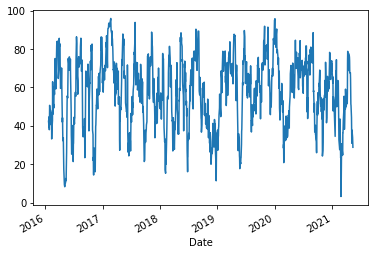

In [98]:
RSI.plot()

In [82]:
periods = [4 ,5, 10, 20, 50, 100]
mov_avg = ut.moving_average(close, 'TSLA', periods)

In [86]:
def bollinger(df: pd.DataFrame, ticker:str, n:int, stds:float) -> pd.DataFrame:
    """
    """
    temp = df[[ticker]].copy()
    temp[f'ma_{n}'] = temp[ticker].rolling(n).mean()
    temp[f'std_{n}'] = temp[ticker].rolling(n).std()
    temp[f'bb_lo_{n}'] = temp[f'ma_{n}'] - stds * temp[f'std_{n}']
    temp[f'bb_hi_{n}'] = temp[f'ma_{n}'] + stds * temp[f'std_{n}']
    temp.drop(f'std_{n}', axis=1, inplace=True)
    return temp

In [108]:
tsla = bollinger(close, 'TSLA', 20, 2)

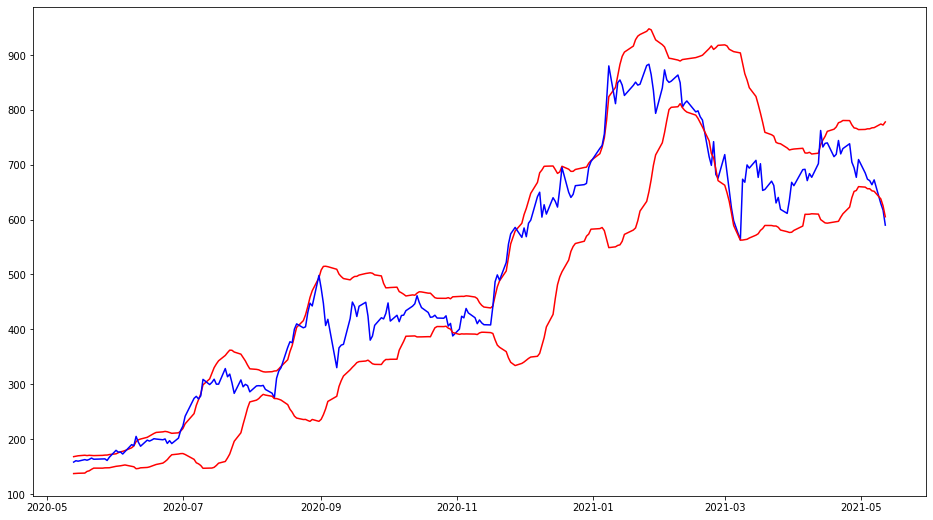

In [109]:
plt.figure(figsize=(16, 9))
plt.plot(tsla['bb_hi_20'].tail(252), color='r')
plt.plot(tsla['TSLA'].tail(252), color='b')
plt.plot(tsla['bb_lo_20'].tail(252), color='r')
plt.show()

In [216]:
(close.iloc[-1]/close.iloc[0]).sort_values()

Symbols
NAKD    0.001320
SQBG    0.040342
AHT     0.042847
OCGN    0.044018
EGLE    0.098132
          ...   
NKLA         NaN
CTRM         NaN
CSSE         NaN
WBT          NaN
NIO          NaN
Length: 148, dtype: float64